# Class 30 - Introduction to `pandas`

[`pandas`](http://pandas.pydata.org/pandas-docs/stable/10min.html) is a powerful data analysis library for manipulating tabular data. Examples of tabular data include spreadsheets and databases having rows and columns of data. We won't be able to cover all the functionality in `pandas`, but we will cover some important essentials for data analysis today:

* Loading data from CSV files and HTML tables into DataFrames
* Creating new DataFrames from lists or dictionaries of values
* Manipulating DataFrames to add new columns
* Summarizing and visualizing data
* Filtering to identify rows fulfilling a criterion

On Wednesday, we will cover some methods for reshaping data by melting, pivoting, stacking, and grouping.

In [1]:
%matplotlib inline
import pandas as pd

Since it's baseball season and there is a long-tradition of collecting statistical data about baseball games, we're going to be using baseball data for the entire tables module.

There are several excellent and distinct sources of baseball data:

* [Retrosheet game logs](http://www.retrosheet.org/gamelogs/index.html)
* [Lahman Database](http://www.seanlahman.com/baseball-archive/statistics/)
* [Baseball-Reference.com](http://www.baseball-reference.com/)

We'll use the Retrosheet game logs data and the Baseball Reference data for the 2016 season. Details about these game log data fields are available [here](http://www.retrosheet.org/gamelogs/glfields.txt).

## Loading from CSV file
If you've downloaded the "GL2016.txt" file, we can load these comma-separated values (CSV) into a DataFrame using pandas's `read_csv` function. Show the first few rows of the table using head.

In [2]:
gamelogs_df = pd.read_csv('GL2016.TXT')
gamelogs_df.head()

,20160403,0,Sun,NYN,NL,1,KCA,AL,1.1,3,...,Salvador Perez,2.2,infao001,Omar Infante,4.3,fuenr001,Reymond Fuentes,9.4,Unnamed: 159,Y
0,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
1,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
2,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,Andrelton Simmons,6,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y
3,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,...,J.J. Hardy,6,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y
4,20160404,0,Mon,CHA,AL,1,OAK,AL,1,4,...,Mark Canha,3,vogts001,Stephen Vogt,2,semim001,Marcus Semien,6,NaN,Y


Note that the file doesn't have any header rows, but pandas assumed the first line was the header -- so we ended up losing a line of data. There are a *ton* of options for loading data under different situations into a DataFrame. In this case, we'll tell `read_csv` there are no headers, so it will make the columns numbers instead.

In [3]:
gamelogs_df = pd.read_csv('GL2016.TXT',header=None)
gamelogs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,...,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,Andrelton Simmons,6,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y
4,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,...,J.J. Hardy,6,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y


This still isn't *quite* right since Python zero-indexes. How can we change the column numbers to correpond with the [game log dictionary](http://www.retrosheet.org/gamelogs/glfields.txt) that start from one?

In [4]:
gamelogs_df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            151, 152, 153, 154, 155, 156, 157, 158, 159, 160],
           dtype='int64', length=161)

In [5]:
len(gamelogs_df.columns)

161

In [6]:
list(range(1,len(gamelogs_df.columns)+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161]

In [7]:
gamelogs_df.columns = range(1,len(gamelogs_df.columns)+1)

gamelogs_df.head()

,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,...,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,Andrelton Simmons,6,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y
4,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,...,J.J. Hardy,6,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y


In [8]:
len(gamelogs_df)

2428

It's often helpful to think of of a DataFrame as a dictionary where the keys are the columns names and the values are the data values in the column. We can access and create columns using similar notation.

Here's accessing a column. The `.head()` is just to return the first 5 results.

In [9]:
gamelogs_df[3].head()

0    Sun
1    Sun
2    Sun
3    Mon
4    Mon
Name: 3, dtype: object

Create a column called "season_year" that has the season year. `pandas` will helpfully broadcast the 2016 value to all the rows in the new column.

In [10]:
gamelogs_df['season_year'] = 2016

Use the [strftime](http://strftime.org/) syntax and the [`to_datetime`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function to convert the 10-digit date in column 1 into a true timestamp.

(Again, the `.head()` just shows the top 5 results)

In [11]:
pd.to_datetime(gamelogs_df[1],format='%Y%m%d').head()

0   2016-04-03
1   2016-04-03
2   2016-04-03
3   2016-04-04
4   2016-04-04
Name: 1, dtype: datetime64[ns]

This shows the data but will not save it; we need to assign it to a new column. Save it to a "datetime" column. (Remember to drop the `.head()` or else it will only save the first 5 rows.

In [12]:
gamelogs_df['datetime'] = pd.to_datetime(gamelogs_df[1],format='%Y%m%d')

The two new columns we added are now the right-most columns after columns 161.

In [13]:
gamelogs_df.head()

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,season_year,datetime
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,...,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016,2016-04-03
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y,2016,2016-04-03
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y,2016,2016-04-03
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y,2016,2016-04-04
4,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,...,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y,2016,2016-04-04


## Loading data from HTML tables

There is also a `read_html` function in pandas that will convert an HTML table into a DataFrame. This is less common because it's so rare to find well-formatted tables, but Baseball-Reference.com has some really nice tables, so let's see what this does.

In [14]:
from bs4 import BeautifulSoup, Comment
import requests

Grab and parse the data about the [final 2016 standings](http://www.baseball-reference.com/leagues/MLB/2016-standings.shtml).

In [20]:
#headers = headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
#raw = requests.get('http://www.baseball-reference.com/leagues/MLB/2015-standings.shtml',headers=headers).text
raw = requests.get('http://www.baseball-reference.com/leagues/MLB/2016-standings.shtml').text
soup = BeautifulSoup(raw,'html.parser')

The Baseball-Reference site is being weird with serving the data. The table data is hidden inside a comment, which BeautifulSoup will ignore by default. So we need to make a pretend soup of all the comments and then find the table inside the pretend soup. This is just a weirdness with the Baseball-Reference site.

The table we want to use is a "sortable stats_table" with id "expanded_standings_overall".

In [22]:
#table_html = soup.find_all('table',{'id':'expanded_standings_overall'})

# Apparently the data is hidden inside an HTML comment tag (?!)
pretend_raw = soup.find_all(text=lambda e: isinstance(e, Comment))[14]
pretend_soup = BeautifulSoup(pretend_raw,'lxml')
table_html = pretend_soup.find_all('table',{'id':'expanded_standings_overall'})[0]

# Once you have your table_html, pandas will read it in for you!
standings_df = pd.read_html(str(table_html),index_col=0)[0]
standings_df

,Tm,Lg,G,W,L,W-L%,Strk,R,RA,Rdiff,...,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,last10,last20,last30
Rk,,,,,,,,,,,,,,,,,,,,,
1.0,CHC,NL,162.0,103,58,0.640,W 1,5.0,3.4,1.6,...,46-34,9-4,22-23,75-41,28-17,31-25,72-33,6-3,12-7,18-11
2.0,TEX,AL,162.0,95,67,0.586,L 2,4.7,4.7,0.0,...,42-39,6-6,36-11,73-48,22-19,60-31,35-36,5-5,11-9,17-13
3.0,WSN,NL,162.0,95,67,0.586,W 2,4.7,3.8,0.9,...,45-36,5-8,26-19,75-53,20-14,31-29,64-38,6-4,11-9,18-12
4.0,CLE,AL,161.0,94,67,0.584,W 3,4.8,4.2,0.6,...,41-39,6-6,28-21,63-47,31-20,48-43,46-24,6-4,12-8,19-11
5.0,BOS,AL,162.0,93,69,0.574,L 2,5.4,4.3,1.1,...,46-35,7-4,20-24,73-52,20-17,55-48,38-21,5-5,13-7,20-10
6.0,LAD,NL,162.0,91,71,0.562,L 3,4.5,3.9,0.5,...,38-43,6-8,22-20,69-47,22-24,31-26,60-45,5-5,11-9,18-12
7.0,TOR,AL,162.0,89,73,0.549,W 2,4.7,4.1,0.6,...,43-38,4-9,21-25,65-53,24-20,58-45,31-28,6-4,11-9,14-16
8.0,BAL,AL,162.0,89,73,0.549,W 1,4.6,4.4,0.2,...,39-42,6-2,21-16,66-50,23-23,53-54,36-19,7-3,11-9,17-13
9.0,SFG,NL,162.0,87,75,0.537,W 4,4.4,3.9,0.5,...,42-39,11-7,28-27,57-53,30-22,27-33,60-42,7-3,10-10,15-15


## Creating from dictionaries and lists of values

Often we may be working with Python primitives (dictionaries and lists) or Numpy arrays, but we want to conver them to a DataFrame. The easiest way to think about DataFrames is as a dictionary keyed by column name with the values being an array of data points.

In [89]:
example_dict = {'column_one':[1,2,3],
                'column_two':['a','b','c']
               }

example_df = pd.DataFrame(example_dict)
example_df

,column_one,column_two
0,1,a
1,2,b
2,3,c


## Selecting a subset of columns and rows

A single column can be selected like a dictionary, but multiple columns can be selected using a list. Here, rows 1, 4, and 7 correspond to the date, visiting team, and home team.

In [115]:
gamelogs_df[[1,4,7]].head()

,1,4,7
0,20160403,NYN,KCA
1,20160403,TOR,TBA
2,20160403,SLN,PIT
3,20160404,CHN,ANA
4,20160404,MIN,BAL


That left-most column starting at 0 isn't really a column, but an index used to define specific rows of the DataFrame. We can access these rows by their index using the `.ix[]` method (pay particular attention to the square brackets). Accessing one row will return all its values in a dictionary-like format where the keys are the column labels and the values are the data points.

In [34]:
gamelogs_df.ix[1]

1                         20160403
2                                0
3                              Sun
4                              TOR
5                               AL
6                                1
7                              TBA
8                               AL
9                                1
10                               5
11                               3
12                              54
13                               D
14                             NaN
15                             NaN
16                             NaN
17                           STP01
18                           31042
19                             171
20                       200100020
21                       001000002
22                              35
23                               7
24                               1
25                               0
26                               1
27                               5
28                               0
29                  

Whereas columns are more like dictionaries, rows are more like lists. We can use the same list slicing notation from before to get different subsets. The first five games.

In [38]:
gamelogs_df.ix[10:150]

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,season_year,datetime
10,20160404,0,Mon,PHI,NL,1,CIN,NL,1,2,...,igler001,Raisel Iglesias,1,hamib001,Billy Hamilton,8,NaN,Y,2016,2016-04-04
11,20160404,0,Mon,SFN,NL,1,MIL,NL,1,12,...,peraw001,Wily Peralta,1,broxk001,Keon Broxton,8,NaN,Y,2016,2016-04-04
12,20160404,0,Mon,LAN,NL,1,SDN,NL,1,15,...,spanc001,Cory Spangenberg,4,rosst001,Tyson Ross,1,NaN,Y,2016,2016-04-04
13,20160405,0,Tue,CHN,NL,2,ANA,AL,2,6,...,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y,2016,2016-04-05
14,20160405,0,Tue,BOS,AL,1,CLE,AL,1,6,...,uribj002,Juan Uribe,5,cowgc001,Collin Cowgill,9,NaN,Y,2016,2016-04-05
15,20160405,0,Tue,NYN,NL,2,KCA,AL,2,2,...,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016,2016-04-05
16,20160405,0,Tue,HOU,AL,1,NYA,AL,1,5,...,casts001,Starlin Castro,4,gregd001,Didi Gregorius,6,NaN,Y,2016,2016-04-05
17,20160405,0,Tue,CHA,AL,2,OAK,AL,2,5,...,alony001,Yonder Alonso,3,semim001,Marcus Semien,6,NaN,Y,2016,2016-04-05
18,20160405,0,Tue,TOR,AL,3,TBA,AL,3,2,...,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y,2016,2016-04-05
19,20160405,0,Tue,SEA,AL,2,TEX,AL,2,10,...,andre001,Elvis Andrus,6,chirr001,Robinson Chirinos,2,NaN,Y,2016,2016-04-05


Every 5th game.

In [42]:
gamelogs_df.ix[::5]

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,season_year,datetime
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,...,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016,2016-04-03
5,20160404,0,Mon,CHA,AL,1,OAK,AL,1,4,...,vogts001,Stephen Vogt,2,semim001,Marcus Semien,6,NaN,Y,2016,2016-04-04
10,20160404,0,Mon,PHI,NL,1,CIN,NL,1,2,...,igler001,Raisel Iglesias,1,hamib001,Billy Hamilton,8,NaN,Y,2016,2016-04-04
15,20160405,0,Tue,NYN,NL,2,KCA,AL,2,2,...,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y,2016,2016-04-05
20,20160405,0,Tue,COL,NL,2,ARI,NL,2,6,...,mills001,Shelby Miller,1,ahmen001,Nick Ahmed,6,NaN,Y,2016,2016-04-05
25,20160406,0,Wed,MIN,AL,2,BAL,AL,2,2,...,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y,2016,2016-04-06
30,20160406,0,Wed,SEA,AL,3,TEX,AL,3,9,...,holab001,Bryan Holaday,2,albeh001,Hanser Alberto,6,NaN,Y,2016,2016-04-06
35,20160406,0,Wed,SFN,NL,3,MIL,NL,3,3,...,jungt001,Taylor Jungmann,1,villj001,Jonathan Villar,6,NaN,Y,2016,2016-04-06
40,20160407,0,Thu,HOU,AL,3,NYA,AL,3,5,...,casts001,Starlin Castro,4,gregd001,Didi Gregorius,6,NaN,Y,2016,2016-04-07
45,20160407,0,Thu,MIA,NL,3,WAS,NL,3,6,...,espid001,Danny Espinosa,6,roart001,Tanner Roark,1,NaN,Y,2016,2016-04-07


Specific row indices passed as a list.

In [129]:
gamelogs_df.ix[[1,2,3,5,7,11,13]]

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,season_year,datetime
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y,2016,2016-04-03
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y,2016,2016-04-03
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y,2016,2016-04-04
5,20160404,0,Mon,CHA,AL,1,OAK,AL,1,4,...,vogts001,Stephen Vogt,2,semim001,Marcus Semien,6,NaN,Y,2016,2016-04-04
7,20160404,0,Mon,SEA,AL,1,TEX,AL,1,2,...,andre001,Elvis Andrus,6,chirr001,Robinson Chirinos,2,NaN,Y,2016,2016-04-04
11,20160404,0,Mon,SFN,NL,1,MIL,NL,1,12,...,peraw001,Wily Peralta,1,broxk001,Keon Broxton,8,NaN,Y,2016,2016-04-04
13,20160405,0,Tue,CHN,NL,2,ANA,AL,2,6,...,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y,2016,2016-04-05


## Sorting data

The data can be sorted by one or more columns with the `.sort_values()` method passing the column title inside. Sort the DataFrame by the highest home team score. `.sort_values()` defaults to an ascending (low-to-high) sort, so pass the argument "ascending=False" to get decending and then get the date, visitor, home, and respective scores.

In [45]:
gamelogs_df.sort_values(10,ascending=False)[[1,4,7,10,11]]

,1,4,7,10,11
1200,20160702,ANA,BOS,21,2
1857,20160822,LAN,CIN,18,9
418,20160505,COL,SFN,17,7
226,20160421,CHN,CIN,16,0
803,20160602,SEA,SDN,16,13
69,20160409,SDN,COL,16,3
1998,20160902,BOS,OAK,16,2
2141,20160912,OAK,KCA,16,3
915,20160611,BOS,MIN,15,4
1062,20160621,SFN,PIT,15,4


In [145]:
gamelogs_df.sort_values(10,ascending=False)[[1,4,7,10,11]].head()

,1,4,7,10,11
1200,20160702,ANA,BOS,21,2
1857,20160822,LAN,CIN,18,9
418,20160505,COL,SFN,17,7
226,20160421,CHN,CIN,16,0
803,20160602,SEA,SDN,16,13


You can sort by multiple values as well to break ties.

In [47]:
gamelogs_df.sort_values([10,11,1],ascending=False)[[1,4,7,10,11]]

,1,4,7,10,11
1200,20160702,ANA,BOS,21,2
1857,20160822,LAN,CIN,18,9
418,20160505,COL,SFN,17,7
803,20160602,SEA,SDN,16,13
2141,20160912,OAK,KCA,16,3
69,20160409,SDN,COL,16,3
1998,20160902,BOS,OAK,16,2
226,20160421,CHN,CIN,16,0
1808,20160819,HOU,BAL,15,8
1702,20160811,HOU,MIN,15,7


## Summarizing data

Let's take the "gamelogs_df" and compute some summary statistics.

First, how many rows in the table? This should correspond to the number of games played in the 2016 regular season.

In [49]:
len(gamelogs_df)

2428

Column 3 is the day of the week the game is played. We can use the `value_counts()` method on the Series to count the number of unique values.

In [51]:
gamelogs_df[3].value_counts()

Sat    391
Fri    388
Sun    388
Wed    374
Tue    369
Mon    274
Thu    244
Name: 3, dtype: int64

We can use the `crosstab` function to compute the cross tabulation of two variables. Column 13 is whether this was a day or night game.

In [54]:
weekday_gametime_crosstab = pd.crosstab(gamelogs_df[3],gamelogs_df[13])
weekday_gametime_crosstab

13,D,N
3,,
Fri,18,370
Mon,52,222
Sat,152,239
Sun,360,28
Thu,71,173
Tue,15,354
Wed,122,252


We can re-organize the index by indexing on the order we desire.

In [55]:
weekdays_in_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
weekday_gametime_crosstab.ix[weekdays_in_order]

13,D,N
3,,
Sun,360,28
Mon,52,222
Tue,15,354
Wed,122,252
Thu,71,173
Fri,18,370
Sat,152,239


You can do more complicated cross-tabs by passing multiple Series within a list. Here's we'll do a cross-tab of day and night games by league and by day of the week.

In [56]:
pd.crosstab(gamelogs_df[3],gamelogs_df[8])

8,AL,NL
3,,
Fri,194,194
Mon,138,136
Sat,196,195
Sun,194,194
Thu,122,122
Tue,186,183
Wed,184,190


In [122]:
weekday_gametime_league_crosstab = pd.crosstab(gamelogs_df[3],[gamelogs_df[8],gamelogs_df[13]])
weekday_gametime_league_crosstab.ix[weekdays_in_order]

8     AL        NL     
13     D    N    D    N
3                      
Sun  185    9  175   19
Mon   23  115   29  107
Tue    7  179    8  175
Wed   55  129   67  123
Thu   36   86   35   87
Fri    3  191   15  179
Sat   86  110   66  129

## Visualizing the data
We can plot the distribution as well. Column 19 is the length of the game in minutes. We can use the `sort_index()` method to make the index (minutes) be in ascending order.

In [59]:
minutes_count = gamelogs_df[19].value_counts().sort_index()
minutes_count.head()

75     1
115    1
122    1
126    1
127    1
Name: 19, dtype: int64

Now plot this distribution using the `.plot()` method.

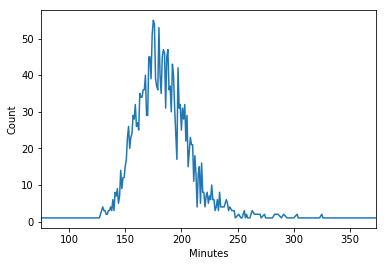

In [60]:
ax = minutes_count.plot()
ax.set_xlabel('Minutes')
ax.set_ylabel('Count')

Alternatively, we could have made a histogram without needing to use `value_counts()` method. There are many options to pass inside the `.plot()` method, here we'll sepcify a histogram and the number of bins.

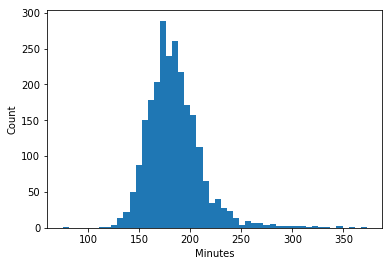

In [61]:
ax = gamelogs_df[19].plot(kind='hist',bins=50)
ax.set_xlabel('Minutes')
ax.set_ylabel('Count')

## Filtering

Suppose we want to inspect specific rows. We can filter the DataFrame down to only those rows that fulfill a criterion. Let's find those games that went longer than 5 hours (300 minutes).

There are two approaches for doing this. The first is by "[boolean indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)". This syntax will return `True` or `False` for every row if the value in column 19 is greater than 300.

In [130]:
gamelogs_df[19] > 300

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2398    False
2399    False
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
2407    False
2408    False
2409    False
2410    False
2411    False
2412    False
2413    False
2414    False
2415    False
2416    False
2417    False
2418    False
2419    False
2420    False
2421    False
2422    False
2423    False
2424    False
2425    False
2426    False
2427    False
Name: 19, dtype: bool

Wrapping this phrase inside the `gamelogs_df` will return only the rows that are true: the games that went longer than 5 hours.

In [62]:
five_hour_games = gamelogs_df[gamelogs_df[19] > 300]
five_hour_games

,1,2,3,4,5,6,7,8,9,10,...,154,155,156,157,158,159,160,161,season_year,datetime
164,20160416,0,Sat,ARI,NL,12,SDN,NL,12,3,...,amara001,Alexi Amarista,4,casha001,Andrew Cashner,1,NaN,Y,2016,2016-04-16
264,20160424,0,Sun,BOS,AL,18,HOU,AL,19,7,...,gonzm002,Marwin Gonzalez,5,castj006,Jason Castro,2,NaN,Y,2016,2016-04-24
268,20160424,0,Sun,PIT,NL,19,ARI,NL,20,12,...,owinc001,Chris Owings,8,ray-r002,Robbie Ray,1,NaN,Y,2016,2016-04-24
275,20160424,0,Sun,MIN,AL,19,WAS,NL,18,5,...,drews001,Stephen Drew,6,stras001,Stephen Strasburg,1,NaN,Y,2016,2016-04-24
492,20160511,0,Wed,CLE,AL,31,HOU,AL,35,3,...,stasm001,Max Stassi,2,marij002,Jake Marisnick,9,NaN,Y,2016,2016-05-11
541,20160514,0,Sat,SDN,NL,38,MIL,NL,37,8,...,maldm001,Martin Maldonado,2,peraw001,Wily Peralta,1,NaN,Y,2016,2016-05-14
651,20160522,0,Sun,LAN,NL,45,SDN,NL,45,9,...,amara001,Alexi Amarista,6,rea-c001,Colin Rea,1,"umpchange,5,umphome,marqa901,5,ump2b,(None)",Y,2016,2016-05-22
975,20160615,0,Wed,CIN,NL,66,ATL,NL,65,8,...,aybae001,Erick Aybar,6,norrb001,Bud Norris,1,NaN,Y,2016,2016-06-15
1191,20160701,0,Fri,CLE,AL,79,TOR,AL,82,2,...,pillk001,Kevin Pillar,8,barnd001,Darwin Barney,4,NaN,Y,2016,2016-07-01
1269,20160706,0,Wed,BAL,AL,84,LAN,NL,87,6,...,ellia001,A.J. Ellis,2,norrb001,Bud Norris,1,NaN,Y,2016,2016-07-06


The second method is to use the `query()` function and pass the argument inside as a string. This may not work well in all situations, such as when the column names are also numbers, which will casue an error. Let's use the standings instead to find the teams that lost more than 90 games.

In [138]:
standings_df.query('L > 90')

,Tm,Lg,G,W,L,W-L%,Strk,R,RA,Rdiff,...,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,last10,last20,last30
Rk,,,,,,,,,,,,,,,,,,,,,
23.0,PHI,NL,162.0,71,91,0.438,W 1,3.8,4.9,-1.1,...,34-47,7-6,28-23,54-74,17-17,27-49,44-42,2-8,8-12,11-19
24.0,ARI,NL,162.0,69,93,0.426,W 3,4.6,5.5,-0.9,...,36-45,8-8,22-17,46-71,23-22,30-52,39-41,5-5,11-9,13-17
25.0,OAK,AL,162.0,69,93,0.426,W 2,4.0,4.7,-0.7,...,35-46,6-5,25-28,53-67,16-26,49-64,20-29,3-7,9-11,12-18
26.0,ATL,NL,161.0,68,93,0.422,W 2,4.0,4.8,-0.8,...,37-43,11-11,21-22,52-62,16-31,27-49,41-44,8-2,14-6,20-10
27.0,TBR,AL,162.0,68,94,0.420,W 2,4.1,4.4,-0.3,...,32-49,4-3,13-27,50-68,18-26,47-74,21-20,3-7,8-12,12-18
28.0,CIN,NL,162.0,68,94,0.420,L 1,4.4,5.3,-0.9,...,30-51,3-10,22-27,54-74,14-20,24-54,44-40,5-5,8-12,13-17
29.0,SDP,NL,162.0,68,94,0.420,L 4,4.2,4.8,-0.5,...,29-52,6-6,19-31,47-72,21-22,32-50,36-44,4-6,9-11,13-17
30.0,MIN,AL,162.0,59,103,0.364,W 2,4.5,5.5,-1.0,...,29-52,6-10,15-29,38-78,21-25,35-75,24-28,4-6,6-14,10-20


The box scores for the games are in columns 20 (visiting) and 21 (home).

In [63]:
five_hour_games[[20,21]]

,20,21
164,00001011000000,02100000000002
264,302000000002,012000002000
268,0035000000022,1030000220020
275,0010000300000010,1000000210000011
492,0011000010000000,0001011000000002
541,202020000002,200000220001
651,00000311000000004,00004001000000000
975,0003030000002,1030110000003
1191,0010000000000000001,0000010000000000000
1269,01110100000002,20002000000000
